<center>

![](https://drive.google.com/uc?export=view&id=1R6EAVE0Ysym-UNtZR-Ze_HcqQLDmH0bd) 
<p> 
College: Engineering and Information Technology <br>
Department: Information Technology <br>
Program: Data Analytics <br>
Academic semester: Fall 2022- 2023 <br>
Data Engineering Lab DAT204 <br>
Dr. Ghazi Al Naymat <br>
Eng. Abdulrahman Al Muaitah <br> 
</p></center>
Lab 11: Near-Miss Undersampling and Feature Selection
</p></center>

In [2]:
#required imports 
from imblearn.under_sampling import RandomUnderSampler, NearMiss 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Near-Miss Undersampling 
Near-Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples.  
There are three versions of the Near-Miss technique:   
1. NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.
2. NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.
3. NearMiss-3: Majority class examples with minimum distance to each minority class example.  

By default: the used version is 1 

In [3]:
import pandas as pd
DF_unbalanced=pd.read_csv('/content/creditcard_sample.csv')
DF_unbalanced.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,158852.0,2.010099,0.088016,-1.613657,0.338279,0.399297,-0.578413,0.058113,-0.063370,0.251756,...,-0.297549,-0.792712,0.358427,0.604631,-0.334153,0.148923,-0.064497,-0.039785,1.98,0
1,68624.0,0.490433,1.790230,-1.817678,1.505143,1.065284,-1.207624,0.785497,-0.009459,-0.459394,...,-0.082447,0.089130,0.131466,-0.122323,-0.534746,-0.397535,0.376633,0.063458,0.89,0
2,76694.0,-1.181955,0.056475,1.922648,-2.362649,-1.185633,-0.039172,-1.480407,-2.606967,-2.725457,...,-1.181047,1.069242,-0.002391,0.405975,0.325761,-0.119257,0.079988,0.081329,21.54,0


In [4]:
DF_unbalanced.shape

(10000, 31)

In [5]:
DF=DF_unbalanced['Class'].value_counts()
# 0 indicates 'Normal', 1 indicates 'Fraud' 
DF.index=['Normal','Fraud']
DF

Normal    9981
Fraud       19
Name: Class, dtype: int64

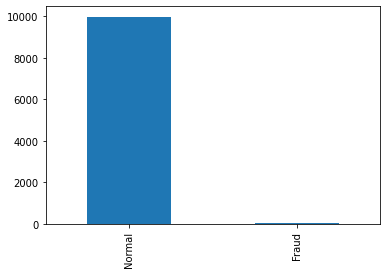

In [6]:
DF.plot(kind='bar')

By default, the near-miss technique will undersample the majority class to have the same number of examples as the minority class, although this can be changed by setting the sampling_strategy argument to a fraction of the minority class.  
Let's demonstrate near-miss version one that only selects majority class examples that have a minimum distance to three minority class instances. defined by *n_neighbors* parameter. 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Balanced Classes')

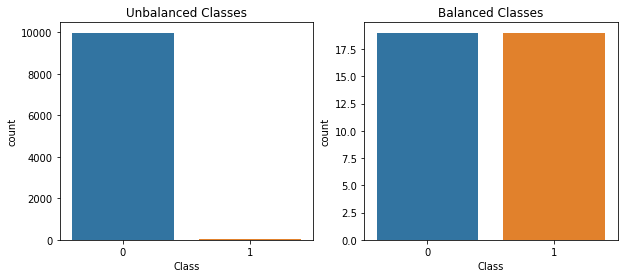

In [8]:
y = DF_unbalanced.Class
X = DF_unbalanced.drop('Class', axis=1)



#Undersampling the majority class 
NMSampler = NearMiss(sampling_strategy=1, version=1, n_neighbors=3) 
x_under,y_under = NMSampler.fit_resample(X,y) 
undersampled = pd.DataFrame(y_under,columns=['Class'])

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)

sns.countplot('Class', data=DF_unbalanced)
plt.title('Unbalanced Classes')

plt.subplot(1,2,2)

sns.countplot('Class', data=undersampled)
plt.title('Balanced Classes')

### Feature Selection  
Feature selection is the process of **selecting a subset of relevant features** for use in machine learning model building. 

We perform feature selection for the following advantages: 
1. Simple models are easier to interpret. 
2. Shorter ML training time.
3. Enhanced generalization by reducing overfitting. 
4. Reduced risk of data errors during model use. 

Feature selection methods:  
**1. Filter Methods**  
**2. Wrapper Methods** 

#### Filter Methods 
1. It relies in the characteristics of the feature. 
2. It doesn't use any machine learning algorithms. 
3. Model agnostic. 
4. Tends to be less computationally expensive. 
5. Usually gives lower prediction performance than a wrapper method. 
6. Very well suited for a quick screen and removal of irrelevant features. 


**Filter Method Techniques:**
1. Basic - constant, quasi-constant, and duplicated features
2. Correlation
3. Statistical 


### Filter Technique - Basic 

In [61]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import VarianceThreshold 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_auc_score 

In [62]:
data = pd.read_csv("/content/creditcard_sample.csv") 
data = pd.read_csv("https://raw.githubusercontent.com/codingnest/FeatureSelection/master/dataset/santander.csv")
data.shape 

(76020, 371)

In [63]:
#Splitting the dataframe vertically to x (input) and y (output)
x = data.iloc[:,:-1] 
y = data.iloc[:,-1] 

In [64]:
#Splitting the dataset horizontally to training and testing sets 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) 
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(53214, 370)
(22806, 370)
(53214,)
(22806,)


In [65]:
X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [66]:
#In this step, we are creating a function to evalaute the performance of the different techniques in machine learning algorithms 
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train Set')
    pred = rf.predict_proba(X_train)
    print("Train Results roc-auc {}".format(roc_auc_score(y_train, pred[:,1])))
    print('Test Set')
    pred= rf.predict_proba(X_test)
    print("Test Results roc-auc {}".format(roc_auc_score(y_test, pred[:,1])))

Constant features - numerical  
**VarianceThreshold** from sklearn, it removes all features whose variance doesn't meet some threshold. It also removes all zero-variance features 

In [67]:
VThreshold = VarianceThreshold(threshold=0) 
VThreshold.fit(X_train)

VarianceThreshold(threshold=0)

In [68]:
#get_support() is a boolean vector that indicates which features are retained 
sum(VThreshold.get_support())

332

In [69]:
#Showing the list of features that got removed from the dataframe 
print([x for x in X_train.columns if x not in X_train.columns[VThreshold.get_support()]])

['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'delta_imp_reemb_var33_1y3', 'delta_num_reemb_var33_1y3', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_reemb_var33_ult1', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_reemb_var33_ult1', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']


In [70]:
features_to_keep = X_train.columns[VThreshold.get_support()]

In [71]:
X_train = VThreshold.transform(X_train)
X_test = VThreshold.transform(X_test)

print(X_train.shape, X_test.shape)

(53214, 332) (22806, 332)


In [72]:
#Evaluating the performance 
run_randomForests(X_train_original, X_test_original, y_train, y_test)

Train Set
Train Results roc-auc 0.8011567441366869
Test Set
Test Results roc-auc 0.7903898679453263


In [73]:
run_randomForests(X_train, X_test, y_train, y_test)

Train Set
Train Results roc-auc 0.8027070226730222
Test Set
Test Results roc-auc 0.7920500469581926


Quasi-constant features 

In [74]:
X_train = pd.DataFrame(X_train)
X_train.columns = features_to_keep
X_test = pd.DataFrame(X_test)
X_test.columns = features_to_keep

In [75]:
X_train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,15083.0,2.0,23.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,103706.0,2.0,48.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,451931.220000
2,93351.0,2.0,40.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41225.670000
3,92424.0,2.0,83.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
4,40437.0,2.0,79.0,0.0,535.41,535.41,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153477.690000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53209,42533.0,53.0,46.0,0.0,1770.48,2669.46,451.74,808.77,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124242.570000
53210,91801.0,2.0,29.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34968.270000
53211,85345.0,9.0,23.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69090.870000
53212,87270.0,2.0,30.0,60.0,72.48,95.64,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66354.510000


In [76]:
QuasiVT = VarianceThreshold(threshold=0.01)
QuasiVT.fit(X_train)

VarianceThreshold(threshold=0.01)

In [77]:
sum(QuasiVT.get_support())

268

In [78]:
print([x for x in X_train.columns if x not in X_train.columns[QuasiVT.get_support()]])

['ind_var1', 'ind_var6_0', 'ind_var6', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var29_0', 'ind_var29', 'ind_var30_0', 'ind_var31_0', 'ind_var31', 'ind_var32_cte', 'ind_var32_0', 'ind_var32', 'ind_var33_0', 'ind_var33', 'ind_var34_0', 'ind_var34', 'ind_var40', 'ind_var39', 'ind_var44_0', 'ind_var44', 'num_var6_0', 'num_var6', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0', 'num_var18', 'num_var29_0', 'num_var29', 'num_var33', 'num_var34_0', 'num_var34', 'delta_imp_aport_var33_1y3', 'delta_num_aport_var33_1y3', 'ind_var7_emit_ult1', 'ind_var7_recib_ult1', 'num_aport_var33_hace3', 'num_aport_var33_ult1', 'num_var7_emit_ult1', 'num_compra_var44_hace3', 'num_meses_var13_medio_ult3', 'num_meses_var17_ult3', 'num_meses_var29_ult3', 'num_meses_var33_ult3', 'num_meses_var44_ult3', 'num_reemb_var13_ult1', 'num_reemb_var17_hace3', 'num_reemb_var17_ult1', 'num

In [79]:
features_to_keep = X_train.columns[QuasiVT.get_support()]

In [80]:
X_train = QuasiVT.transform(X_train)
X_test = QuasiVT.transform(X_test)
print(X_train.shape, X_test.shape)

(53214, 268) (22806, 268)


In [81]:
#Original data
run_randomForests(X_train_original, X_test_original, y_train, y_test)
# Quasi-Constant values Removal
run_randomForests(X_train, X_test, y_train, y_test)

Train Set
Train Results roc-auc 0.8011567441366869
Test Set
Test Results roc-auc 0.7903898679453263
Train Set
Train Results roc-auc 0.8003515381528266
Test Set
Test Results roc-auc 0.7892766099423427


### Filter Technique - Correlation  
1. Correlation is a measure of the linear relationship of 2 or more variables. 
2. Through correlation, we can predict one varialbe from the other. 
3. Variables should be correlated with the target but uncorrelated with themselves. 
4. If 2 features are highly correlated, then the second one will add little information over the previous one, so removing it helps reduce the dimensionality. 

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
X_train = pd.DataFrame(X_train)
X_train.columns = features_to_keep
X_test = pd.DataFrame(X_test)
X_test.columns = features_to_keep

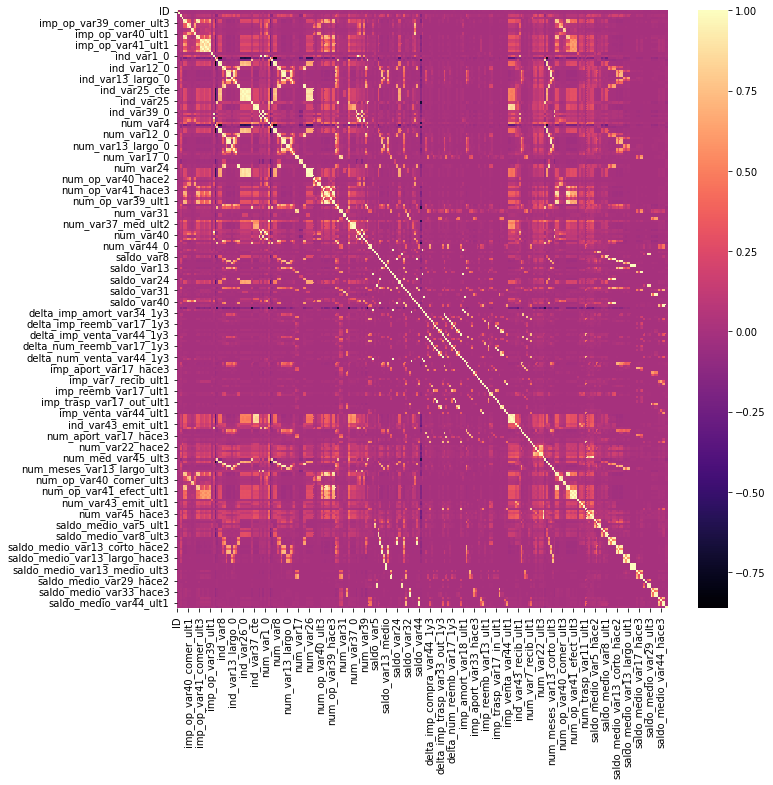

In [83]:
corr_mat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr_mat, cmap='magma');

In [84]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(0, len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [85]:
corr_features = correlation(X_train,0.8) 
len(set(corr_features))

149

In [86]:
X_train.drop(labels=set(corr_features), axis=1, inplace=True)
X_test.drop(labels=set(corr_features), axis=1, inplace=True)

print(X_train.shape, X_test.shape)

(53214, 119) (22806, 119)


In [87]:
#Original data
run_randomForests(X_train_original, X_test_original, y_train, y_test)
#High Correlation values Removal
run_randomForests(X_train, X_test, y_train, y_test)

Train Set
Train Results roc-auc 0.8011567441366869
Test Set
Test Results roc-auc 0.7903898679453263
Train Set
Train Results roc-auc 0.8080169064904122
Test Set
Test Results roc-auc 0.7951632012093584


### Filter Technique - Statistical 

Information Gain - Mutual Information: It measures how much information the presence/absence of a feature contributes to making the correct prediction on Y. Mutual Information is the same as the entropy of X and as the entropy of Y.

In [88]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [89]:
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

num_var4                    0.014570
var15                       0.014389
saldo_var30                 0.013314
ind_var5                    0.012338
saldo_medio_var5_hace2      0.012211
                              ...   
imp_trasp_var33_in_hace3    0.000000
num_var17_0                 0.000000
ind_var43_recib_ult1        0.000000
var21                       0.000000
num_op_var40_hace2          0.000000
Length: 119, dtype: float64

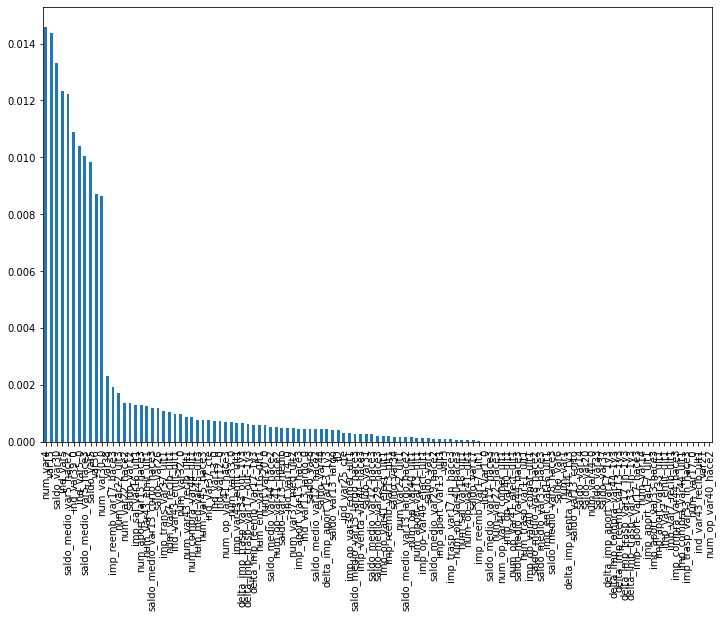

In [90]:
mi.sort_values(ascending=False).plot.bar(figsize=(12,8))

In [91]:
# selecting the top 10 features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)
X_train.columns[sel_.get_support()]

Index(['var15', 'ind_var5_0', 'ind_var5', 'ind_var39_0', 'num_var4',
       'saldo_var5', 'saldo_var30', 'var36', 'saldo_medio_var5_hace2',
       'saldo_medio_var5_hace3'],
      dtype='object')

### Wrapper Methods 
1. Greedy search algorithms 
2. Utlize a specific classifier to select the optimal set of features 
3. Sequential feature selection algorithms add or remove one feature at the time based on the classifier performances until a feature subset of the desired size k is reached, or any other desired criteria is met. 

#### 1. Step Forward Feature Selection

In [98]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
warnings.filterwarnings('ignore')
sfs1 = SFS(RandomForestClassifier(n_jobs=8),
          k_features=5,
          forward=True,
          floating=False,
          verbose=2,
          scoring='roc_auc',
          cv=3)
sfs1 = sfs1.fit(X_train.values, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 119 out of 119 | elapsed:  6.5min finished

[2022-11-13 10:17:58] Features: 1/5 -- score: 0.7020754721740183[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:  8.7min finished

[2022-11-13 10:26:39] Features: 2/5 -- score: 0.7570073897700115[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 117 out of 117 | elapsed:  9.1min finished

[2022-11-13 10:35:43] Features: 3/5 -- score: 0.7789974625691108[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [99]:
selected_feat = X_train.columns[list(sfs1.k_feature_idx_)]
print(selected_feat)


Index(['var15', 'ind_var5', 'ind_var13_0', 'num_var30_0', 'saldo_var12'], dtype='object')


In [100]:
run_randomForests(X_train[selected_feat], X_test[selected_feat], y_train, y_test)

Train Set
Train Results roc-auc 0.8070751741692861
Test Set
Test Results roc-auc 0.8011964993457039


#### Step Backward Feature Selection 

In [101]:
#sfs2 = SFS(RandomForestClassifier(n_jobs=8),
#          k_features = 15,
#          forward = False,
#          floating=False,
#          verbose=2,
#          scoring='roc_auc',
#          cv=3)

#sfs2 = sfs2.fit(X_train.values, y_train)

In [102]:
#selected_feat = X_train.columns[list(sfs2.k_feature_idx_)]
#print(selected_feat)

In [104]:
#run_randomForests(X_train[selected_feat], X_test[selected_feat], y_train, y_test)

#### Exhaustive Feature Selection 

In [107]:
#from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
#efs1 = EFS(RandomForestClassifier(n_jobs=8, random_state=0),
#          min_features=1,
#          max_features=4,
#          scoring='roc_auc',
#          print_progress=True,
#          cv=2)

#efs1 = efs1.fit(X_train.values, y_train)

In [105]:
#selected_feat = X_train.columns[list(efs1.best_idx_)]
#print(selected_feat)

In [106]:
#run_randomForests(X_train[selected_feat], X_test[selected_feat], y_train, y_test)

### **QUESTIONS**
1. Load the "wine.csv" dataset into a dataframe (Note: the first column of the dataframe, is the target/output)  
2. How many rows and columns does the dataframe have? 
3. Split the dataframe vertically (x and y) 
4. Split the dataframe horizontally using train_test_split, with a train/test ratio of 75/25 
5. Use the code seen in the previous steps to plot the correlation matrix of all the features. 
3. Apply the correlation filtering technique, set the threshold to 0.65, How many did you filter out? And what are the names of such features. 
7. Using the information gain statistical approach, estimate the mutual information for the features, and select the top 3 features. 